In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('tables/EXIST2025_train.csv')


In [27]:
categorical_cols = ["gender", "age", "ethnicity", "education", "country"]

# Drop or fillna???
df = df.dropna(subset=categorical_cols + ["label_task1_1"])

df["label_task1_1"] = df["label_task1_1"].map({"YES": 1, "NO": 0})

# One-hot encode
X = pd.get_dummies(df[categorical_cols])
y = df["label_task1_1"]


In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [29]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(importances_df.head(10))


                                       feature  importance
14  education_High school degree or equivalent    0.053145
12                 education_Bachelor’s degree    0.048702
0                                     gender_F    0.047481
1                                     gender_M    0.045714
3                                    age_23-45    0.043155
4                                      age_46+    0.042174
2                                    age_18-22    0.041142
16                   education_Master’s degree    0.040299
40                              country_Poland    0.038988
10                ethnicity_White or Caucasian    0.037921


C:\Users\marta\AppData\Local\Temp\ipykernel_15244\2625453907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df.head(10), x="importance", y="feature", palette="crest")


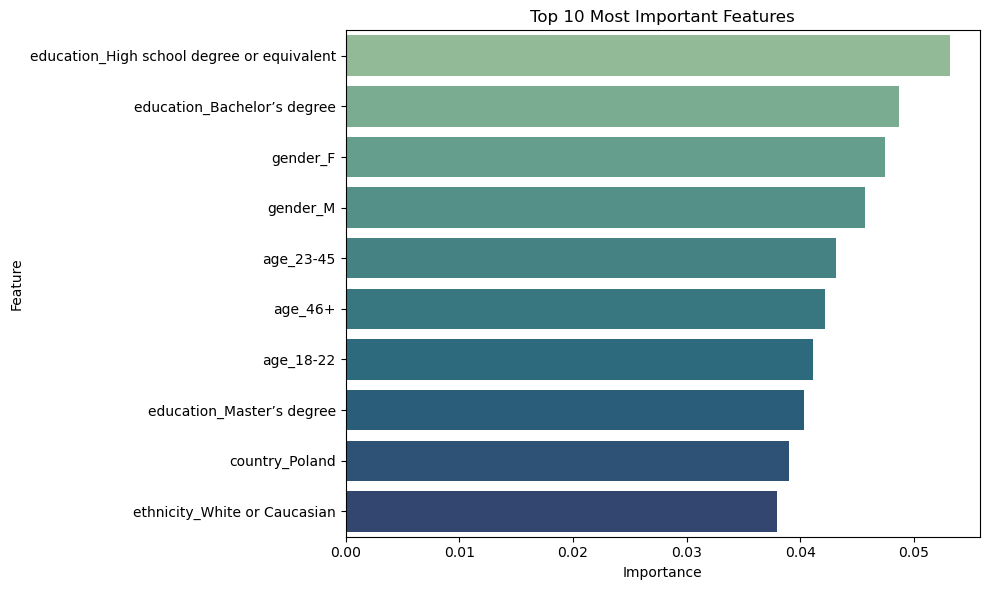

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(10), x="importance", y="feature", palette="crest")
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
